In [1]:
from functions import extract_gist_features, diversity_experiment
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf

Using TensorFlow backend.


In [2]:
# --- constants/globals --- #

# parameter for gist features
NBLOCKS = 4

# training hyperparameters
LR = .001
MOMENTUM = .9
BATCH_SIZE = 32
RUNS = 16
PATIENCE = 2

# dataset parameters
TRAIN_SIZES = [50, 100, 150, 200, 250, 500, 750, 1000, 2000]
VAL_SIZE = 1000
RUNS = 10

In [3]:
# load the cifar-10 data
cifar = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()

In [4]:
# extract gist features
if 'cifar_gist_features.npy' not in os.listdir():
    x_gist = extract_gist_features(x_train, NBLOCKS)
    np.save('./cifar_gist_features.npy', x_gist)
else:
    x_gist = np.load('cifar_gist_features.npy')

In [5]:
# perform experiment
results_df = diversity_experiment(x_train, y_train, 
                                  x_gist, x_test, y_test, 
                                  train_sizes=TRAIN_SIZES,
                                  val_size=VAL_SIZE,
                                  runs=RUNS,
                                  lr=LR, momentum=MOMENTUM, 
                                  batch_size=BATCH_SIZE,
                                  patience=PATIENCE,
                                  verbose=0)

performing experiment for train size=50
performing experiment for train size=100
performing experiment for train size=150
performing experiment for train size=200
performing experiment for train size=250
performing experiment for train size=500
performing experiment for train size=750
performing experiment for train size=1000
performing experiment for train size=2000


In [6]:
results_df.to_csv('cifar-results.csv')

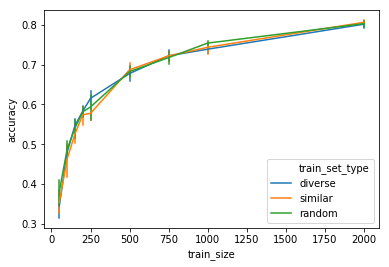

In [7]:
sns.lineplot(data=results_df, 
             x='train_size', y='accuracy', hue='train_set_type',
             err_style='bars')